# MODELO SIR: Ajuste de datos para México

José Domingo Cajina Ramírez \\
Proyecto Final: Investigación de Operaciones


---

Este es uno de los modelos epidemiológicos mas sencillos capaz de describir con pocas suposiciones un brote epidémico.

 El nombre del modelo viene de las iniciales S (Susceptible), I (Infectados) y R ( Recuperados), donde S son todas las personas que podrían contraer la enfermedad, I son la cantidad de infectados iniciales en el sistema y R son las personas que han adquirido inmunidad, ya se por superar la enfermedad o por haber fallecido.



---

Se desea realizar un ajuste del modelo a la evolución de la pandemia en México, por lo que descargamos la base de datos de un sitio oficial y la incluimos en el repositorio de este notebook, comenzamos preprocesando los datos para dejarlos listos para el análisis



In [0]:
#importamos librerias
import pandas as pd
import matplotlib.pyplot as plt
import scipy.integrate
import numpy as np
import time
import datetime
plt.style.use('fivethirtyeight')

In [0]:
#Descargamos Data del repositorio

#Datos de casos confirmados
!wget -cq https://raw.githubusercontent.com/Physicworld/ProyectoIO/master/Data_Base/Casos_Diarios_Estado_Nacional_Confirmados.csv

#Datos de defunciones
!wget -cq https://raw.githubusercontent.com/Physicworld/ProyectoIO/master/Data_Base/Casos_Diarios_Estado_Nacional_Defunciones.csv

#Datos de casos negativos
!wget -cq https://raw.githubusercontent.com/Physicworld/ProyectoIO/master/Data_Base/Casos_Diarios_Estado_Nacional_Negativos.csv

#Datos de casos sospechosos
!wget -cq https://raw.githubusercontent.com/Physicworld/ProyectoIO/master/Data_Base/Casos_Diarios_Estado_Nacional_Sospechosos.csv

In [0]:
#Creamos un dataframe de los datos

df = pd.read_csv("Casos_Diarios_Estado_Nacional_Confirmados.csv", encoding='Latin-1')
data_casos_confirmados = pd.DataFrame(df)

df = pd.read_csv("Casos_Diarios_Estado_Nacional_Defunciones.csv", encoding='Latin-1')
data_casos_defunciones = pd.DataFrame(df)

df = pd.read_csv("Casos_Diarios_Estado_Nacional_Negativos.csv", encoding='Latin-1')
data_casos_negativos = pd.DataFrame(df)

df = pd.read_csv("Casos_Diarios_Estado_Nacional_Sospechosos.csv", encoding='Latin-1')
data_casos_sospechosos = pd.DataFrame(df)


# Damos pantalla a cada DataFrame

In [0]:
data_casos_confirmados.head(3)

,cve_ent,poblacion,nombre,07-01-2020,08-01-2020,09-01-2020,10-01-2020,11-01-2020,12-01-2020,13-01-2020,14-01-2020,15-01-2020,16-01-2020,17-01-2020,18-01-2020,19-01-2020,20-01-2020,21-01-2020,22-01-2020,23-01-2020,24-01-2020,25-01-2020,26-01-2020,27-01-2020,28-01-2020,29-01-2020,30-01-2020,31-01-2020,01-02-2020,02-02-2020,03-02-2020,04-02-2020,05-02-2020,06-02-2020,07-02-2020,08-02-2020,09-02-2020,10-02-2020,11-02-2020,12-02-2020,...,31-03-2020,01-04-2020,02-04-2020,03-04-2020,04-04-2020,05-04-2020,06-04-2020,07-04-2020,08-04-2020,09-04-2020,10-04-2020,11-04-2020,12-04-2020,13-04-2020,14-04-2020,15-04-2020,16-04-2020,17-04-2020,18-04-2020,19-04-2020,20-04-2020,21-04-2020,22-04-2020,23-04-2020,24-04-2020,25-04-2020,26-04-2020,27-04-2020,28-04-2020,29-04-2020,30-04-2020,01-05-2020,02-05-2020,03-05-2020,04-05-2020,05-05-2020,06-05-2020,07-05-2020,08-05-2020,09-05-2020
0,0,127792286,Nacional,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,...,275,315,297,331,214,217,526,435,505,404,476,395,417,801,810,841,854,1000,688,636,1287,1254,1180,1259,1457,907,853,1603,1575,1534,1435,976,907,840,1756,1282,1144,716,356,44
1,1,1434635,AGUASCALIENTES,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,3,4,1,1,0,2,1,2,7,1,11,6,17,13,3,16,13,13,20,11,1,7,16,29,17,22,4,2,2,30,1,0,0,0,0
2,2,3634868,BAJA CALIFORNIA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,45,64,29,39,24,20,68,38,59,59,46,33,40,81,101,96,83,88,40,35,97,84,74,104,87,44,55,94,87,100,67,57,32,46,67,44,42,19,3,2


In [0]:
data_casos_defunciones.head(3)

,cve_ent,poblacion,nombre,17-03-2020,18-03-2020,19-03-2020,20-03-2020,21-03-2020,22-03-2020,23-03-2020,24-03-2020,25-03-2020,26-03-2020,27-03-2020,28-03-2020,29-03-2020,30-03-2020,31-03-2020,01-04-2020,02-04-2020,03-04-2020,04-04-2020,05-04-2020,06-04-2020,07-04-2020,08-04-2020,09-04-2020,10-04-2020,11-04-2020,12-04-2020,13-04-2020,14-04-2020,15-04-2020,16-04-2020,17-04-2020,18-04-2020,19-04-2020,20-04-2020,21-04-2020,22-04-2020,23-04-2020,24-04-2020,25-04-2020,26-04-2020,27-04-2020,28-04-2020,29-04-2020,30-04-2020,01-05-2020,02-05-2020,03-05-2020,04-05-2020,05-05-2020,06-05-2020,07-05-2020,08-05-2020,09-05-2020,10-05-2020
0,0,127792286,Nacional,0,2,0,1,0,1,1,2,2,8,6,13,8,11,21,18,25,31,29,26,53,54,45,48,57,61,61,66,76,81,63,83,86,104,112,112,119,116,138,140,138,129,116,143,139,146,136,111,130,131,109,79,55,20,3
1,1,1434635,AGUASCALIENTES,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,1,0,0,0,1,0,2,2,0,0,0
2,2,3634868,BAJA CALIFORNIA,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,5,2,5,1,10,5,6,5,6,9,11,7,10,14,10,15,13,16,10,11,14,14,21,12,12,25,13,20,12,14,14,5,11,14,12,10,13,1,0


In [0]:
data_casos_negativos.head(3)

,cve_ent,poblacion,nombre,31-12-2019,01-01-2020,02-01-2020,03-01-2020,04-01-2020,05-01-2020,06-01-2020,07-01-2020,08-01-2020,09-01-2020,10-01-2020,11-01-2020,12-01-2020,13-01-2020,14-01-2020,15-01-2020,16-01-2020,17-01-2020,18-01-2020,19-01-2020,20-01-2020,21-01-2020,22-01-2020,23-01-2020,24-01-2020,25-01-2020,26-01-2020,27-01-2020,28-01-2020,29-01-2020,30-01-2020,31-01-2020,01-02-2020,02-02-2020,03-02-2020,04-02-2020,05-02-2020,...,31-03-2020,01-04-2020,02-04-2020,03-04-2020,04-04-2020,05-04-2020,06-04-2020,07-04-2020,08-04-2020,09-04-2020,10-04-2020,11-04-2020,12-04-2020,13-04-2020,14-04-2020,15-04-2020,16-04-2020,17-04-2020,18-04-2020,19-04-2020,20-04-2020,21-04-2020,22-04-2020,23-04-2020,24-04-2020,25-04-2020,26-04-2020,27-04-2020,28-04-2020,29-04-2020,30-04-2020,01-05-2020,02-05-2020,03-05-2020,04-05-2020,05-05-2020,06-05-2020,07-05-2020,08-05-2020,09-05-2020
0,0,127792286,Nacional,0,5,16,18,6,14,28,27,15,45,39,5,20,36,51,59,43,42,16,21,65,52,56,46,46,15,33,43,50,30,39,30,8,12,13,51,45,...,1214,1252,1382,1388,840,585,1439,1524,1644,1226,1423,952,760,1941,2013,1865,1755,1948,870,791,2156,1950,1878,2079,2337,1163,911,2425,2524,2844,3191,1405,1134,1171,2716,2115,1824,1271,578,87
1,1,1434635,AGUASCALIENTES,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,2,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,...,28,40,43,39,31,12,40,34,31,2,16,23,13,46,43,61,34,22,17,28,84,62,45,90,89,6,23,83,87,113,126,15,17,138,49,23,6,2,1,0
2,2,3634868,BAJA CALIFORNIA,0,0,0,2,1,1,3,1,1,3,3,0,0,1,1,7,0,2,0,1,5,3,2,1,2,0,0,3,0,1,1,2,2,0,2,0,4,...,41,39,34,28,15,8,32,31,24,26,35,14,11,33,42,39,42,44,13,12,48,51,41,35,36,19,11,45,44,35,59,16,10,16,30,14,27,9,1,0


In [0]:
data_casos_sospechosos.head(3)

,cve_ent,poblacion,nombre,23-03-2020,24-03-2020,25-03-2020,26-03-2020,27-03-2020,28-03-2020,29-03-2020,30-03-2020,31-03-2020,01-04-2020,02-04-2020,03-04-2020,04-04-2020,05-04-2020,06-04-2020,07-04-2020,08-04-2020,09-04-2020,10-04-2020,11-04-2020,12-04-2020,13-04-2020,14-04-2020,15-04-2020,16-04-2020,17-04-2020,18-04-2020,19-04-2020,20-04-2020,21-04-2020,22-04-2020,23-04-2020,24-04-2020,25-04-2020,26-04-2020,27-04-2020,28-04-2020,29-04-2020,30-04-2020,01-05-2020,02-05-2020,03-05-2020,04-05-2020,05-05-2020,06-05-2020,07-05-2020,08-05-2020,09-05-2020,10-05-2020
0,0,127792286,Nacional,0,1,2,2,3,3,1,5,8,12,9,13,4,2,2,0,5,3,4,4,0,1,14,24,17,8,11,14,23,21,27,58,46,44,57,103,116,147,235,472,681,705,1430,1455,2724,3686,4735,2402,640
1,1,1434635,AGUASCALIENTES,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,58,65,81,152,44,14,1
2,2,3634868,BAJA CALIFORNIA,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,1,3,2,6,2,3,0,2,9,9,10,9,15,51,44,44,80,96,95,116,140,59,18


Nuestro objeto de estudio es el pais entero y no particularmente cada estado, podemos ver que cada grupo de datos nos da los datos nacionales en cada fecha, por lo cual nos quedaremos únicamente con la primera fila de cada dataframe.


In [0]:
df = data_casos_confirmados.drop(range(1,len(data_casos_confirmados)), axis=0)
data_casos_confirmados = df
data_casos_confirmados

,cve_ent,poblacion,nombre,07-01-2020,08-01-2020,09-01-2020,10-01-2020,11-01-2020,12-01-2020,13-01-2020,14-01-2020,15-01-2020,16-01-2020,17-01-2020,18-01-2020,19-01-2020,20-01-2020,21-01-2020,22-01-2020,23-01-2020,24-01-2020,25-01-2020,26-01-2020,27-01-2020,28-01-2020,29-01-2020,30-01-2020,31-01-2020,01-02-2020,02-02-2020,03-02-2020,04-02-2020,05-02-2020,06-02-2020,07-02-2020,08-02-2020,09-02-2020,10-02-2020,11-02-2020,12-02-2020,...,31-03-2020,01-04-2020,02-04-2020,03-04-2020,04-04-2020,05-04-2020,06-04-2020,07-04-2020,08-04-2020,09-04-2020,10-04-2020,11-04-2020,12-04-2020,13-04-2020,14-04-2020,15-04-2020,16-04-2020,17-04-2020,18-04-2020,19-04-2020,20-04-2020,21-04-2020,22-04-2020,23-04-2020,24-04-2020,25-04-2020,26-04-2020,27-04-2020,28-04-2020,29-04-2020,30-04-2020,01-05-2020,02-05-2020,03-05-2020,04-05-2020,05-05-2020,06-05-2020,07-05-2020,08-05-2020,09-05-2020
0,0,127792286,Nacional,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,...,275,315,297,331,214,217,526,435,505,404,476,395,417,801,810,841,854,1000,688,636,1287,1254,1180,1259,1457,907,853,1603,1575,1534,1435,976,907,840,1756,1282,1144,716,356,44


In [0]:
df = data_casos_defunciones.drop(range(1,len(data_casos_defunciones)), axis=0)
data_casos_defunciones = df
data_casos_defunciones

,cve_ent,poblacion,nombre,17-03-2020,18-03-2020,19-03-2020,20-03-2020,21-03-2020,22-03-2020,23-03-2020,24-03-2020,25-03-2020,26-03-2020,27-03-2020,28-03-2020,29-03-2020,30-03-2020,31-03-2020,01-04-2020,02-04-2020,03-04-2020,04-04-2020,05-04-2020,06-04-2020,07-04-2020,08-04-2020,09-04-2020,10-04-2020,11-04-2020,12-04-2020,13-04-2020,14-04-2020,15-04-2020,16-04-2020,17-04-2020,18-04-2020,19-04-2020,20-04-2020,21-04-2020,22-04-2020,23-04-2020,24-04-2020,25-04-2020,26-04-2020,27-04-2020,28-04-2020,29-04-2020,30-04-2020,01-05-2020,02-05-2020,03-05-2020,04-05-2020,05-05-2020,06-05-2020,07-05-2020,08-05-2020,09-05-2020,10-05-2020
0,0,127792286,Nacional,0,2,0,1,0,1,1,2,2,8,6,13,8,11,21,18,25,31,29,26,53,54,45,48,57,61,61,66,76,81,63,83,86,104,112,112,119,116,138,140,138,129,116,143,139,146,136,111,130,131,109,79,55,20,3


In [0]:
df = data_casos_negativos.drop(range(1,len(data_casos_negativos)), axis=0)
data_casos_negativos = df
data_casos_negativos

,cve_ent,poblacion,nombre,31-12-2019,01-01-2020,02-01-2020,03-01-2020,04-01-2020,05-01-2020,06-01-2020,07-01-2020,08-01-2020,09-01-2020,10-01-2020,11-01-2020,12-01-2020,13-01-2020,14-01-2020,15-01-2020,16-01-2020,17-01-2020,18-01-2020,19-01-2020,20-01-2020,21-01-2020,22-01-2020,23-01-2020,24-01-2020,25-01-2020,26-01-2020,27-01-2020,28-01-2020,29-01-2020,30-01-2020,31-01-2020,01-02-2020,02-02-2020,03-02-2020,04-02-2020,05-02-2020,...,31-03-2020,01-04-2020,02-04-2020,03-04-2020,04-04-2020,05-04-2020,06-04-2020,07-04-2020,08-04-2020,09-04-2020,10-04-2020,11-04-2020,12-04-2020,13-04-2020,14-04-2020,15-04-2020,16-04-2020,17-04-2020,18-04-2020,19-04-2020,20-04-2020,21-04-2020,22-04-2020,23-04-2020,24-04-2020,25-04-2020,26-04-2020,27-04-2020,28-04-2020,29-04-2020,30-04-2020,01-05-2020,02-05-2020,03-05-2020,04-05-2020,05-05-2020,06-05-2020,07-05-2020,08-05-2020,09-05-2020
0,0,127792286,Nacional,0,5,16,18,6,14,28,27,15,45,39,5,20,36,51,59,43,42,16,21,65,52,56,46,46,15,33,43,50,30,39,30,8,12,13,51,45,...,1214,1252,1382,1388,840,585,1439,1524,1644,1226,1423,952,760,1941,2013,1865,1755,1948,870,791,2156,1950,1878,2079,2337,1163,911,2425,2524,2844,3191,1405,1134,1171,2716,2115,1824,1271,578,87


In [0]:
df = data_casos_sospechosos.drop(range(1,len(data_casos_sospechosos)), axis=0)
data_casos_sospechosos = df
data_casos_sospechosos

,cve_ent,poblacion,nombre,23-03-2020,24-03-2020,25-03-2020,26-03-2020,27-03-2020,28-03-2020,29-03-2020,30-03-2020,31-03-2020,01-04-2020,02-04-2020,03-04-2020,04-04-2020,05-04-2020,06-04-2020,07-04-2020,08-04-2020,09-04-2020,10-04-2020,11-04-2020,12-04-2020,13-04-2020,14-04-2020,15-04-2020,16-04-2020,17-04-2020,18-04-2020,19-04-2020,20-04-2020,21-04-2020,22-04-2020,23-04-2020,24-04-2020,25-04-2020,26-04-2020,27-04-2020,28-04-2020,29-04-2020,30-04-2020,01-05-2020,02-05-2020,03-05-2020,04-05-2020,05-05-2020,06-05-2020,07-05-2020,08-05-2020,09-05-2020,10-05-2020
0,0,127792286,Nacional,0,1,2,2,3,3,1,5,8,12,9,13,4,2,2,0,5,3,4,4,0,1,14,24,17,8,11,14,23,21,27,58,46,44,57,103,116,147,235,472,681,705,1430,1455,2724,3686,4735,2402,640


Un dato en comun de cada data frame es la poblacion nacional podemos ver que es de 127792286 	habitantes.

La intencion es crear una sola tabla de datos para toda la estadísitica para su fácil manejo, por que lo que ponemos de index las fechas, transponemos cada dataframe y los unimos.

In [0]:
casos_mexico = pd.concat([data_casos_confirmados,data_casos_negativos, data_casos_sospechosos, data_casos_defunciones], axis=0)
casos_mexico = casos_mexico.drop(['cve_ent', 'poblacion'], axis=1)
casos_mexico = casos_mexico.fillna(0)

In [0]:
casos_mexico['nombre'].iloc[0] = 'casos_confirmados'
casos_mexico['nombre'].iloc[1] = 'casos_negativos'
casos_mexico['nombre'].iloc[2] = 'casos_sospechosos'
casos_mexico['nombre'].iloc[3] = 'casos_defunciones'
casos_mexico = casos_mexico.rename(columns={'nombre':'Fecha'})
casos_mexico = casos_mexico.reset_index().transpose().reset_index().drop(0, axis=0)
casos_mexico.columns = ['Fecha', 'casos_confirmados', 'casos_negativos','casos_sospechosos', 'casos_defunciones']
casos_mexico = casos_mexico.drop(1, axis=0)
casos_mexico.iloc[:,0] = pd.to_datetime( casos_mexico.iloc[:, 0], format = '%d-%m-%Y')
casos_mexico = casos_mexico.set_index( pd.DatetimeIndex(casos_mexico['Fecha']))
casos_mexico = casos_mexico.sort_index()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
casos_mexico.head(5)

,Fecha,casos_confirmados,casos_negativos,casos_sospechosos,casos_defunciones
Fecha,,,,,
2019-12-31,2019-12-31,0,0,0,0
2020-01-01,2020-01-01,0,5,0,0
2020-01-02,2020-01-02,0,16,0,0
2020-01-03,2020-01-03,0,18,0,0
2020-01-04,2020-01-04,0,6,0,0


# Ahora vamos a proceder a visualizar los datos


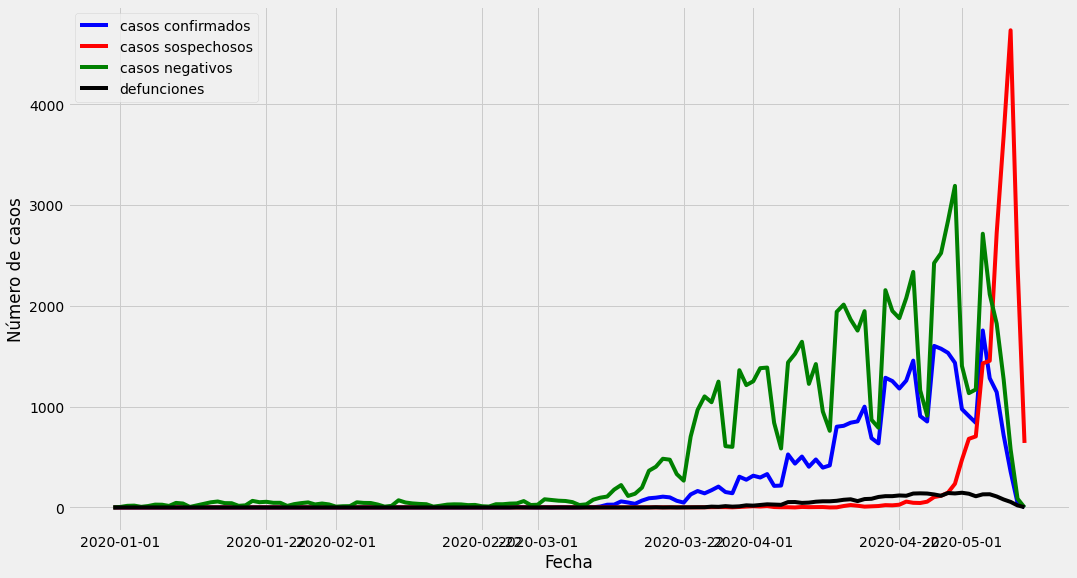

In [0]:
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(casos_mexico['casos_confirmados'], label='casos confirmados', color='blue')
ax.plot(casos_mexico['casos_sospechosos'], label='casos sospechosos', color='red')
ax.plot(casos_mexico['casos_negativos'], label='casos negativos', color='green')
ax.plot(casos_mexico['casos_defunciones'], label='defunciones', color='black')
ax.set_xlabel('Fecha')
ax.set_ylabel('Número de casos')
plt.legend()
plt.savefig('COVID-19')
plt.show()

Observamos que los datos no están registrados de forma acumulativa, y para nuestro análisis necesitamos tener los datos acumulados, por lo que procedemos a solucionar este problema en nuestra base de datos y los visualizamos de nuevo.

Se define el acumulado como la suma de los dias anteriores a el:

$ data_{i} = data_{i} + data_{i-1}$ \\
De esta forma iterativamente obtendremos la estadística acumulada de los datos.

In [0]:
for i in range(1,len(casos_mexico)):
  casos_mexico['casos_confirmados'].iloc[i] = casos_mexico['casos_confirmados'].iloc[i] + casos_mexico['casos_confirmados'].iloc[i-1]
  casos_mexico['casos_negativos'].iloc[i] = casos_mexico['casos_negativos'].iloc[i] + casos_mexico['casos_negativos'].iloc[i-1]
  casos_mexico['casos_sospechosos'].iloc[i] = casos_mexico['casos_sospechosos'].iloc[i] + casos_mexico['casos_sospechosos'].iloc[i-1]
  casos_mexico['casos_defunciones'].iloc[i] = casos_mexico['casos_defunciones'].iloc[i] + casos_mexico['casos_defunciones'].iloc[i-1]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
casos_mexico.tail(3)

,Fecha,casos_confirmados,casos_negativos,casos_sospechosos,casos_defunciones
Fecha,,,,,
2020-05-08,2020-05-08,34978,75868,16937,3442
2020-05-09,2020-05-09,35022,75955,19339,3462
2020-05-10,2020-05-10,35022,75955,19979,3465



# Procedemos a visualizar los datos de nuevo


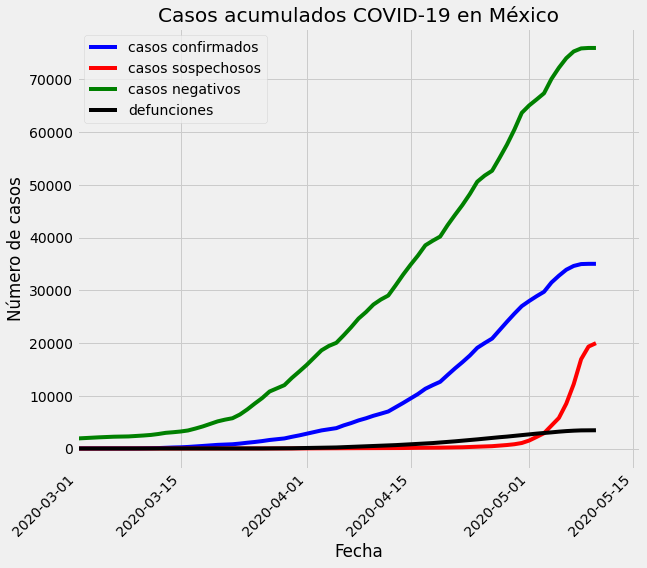

In [0]:
fig, ax = plt.subplots(figsize=(9,9))

ax.set_title('Casos acumulados COVID-19 en México')
ax.plot(casos_mexico['casos_confirmados'], label='casos confirmados', color='blue')
ax.plot(casos_mexico['casos_sospechosos'], label='casos sospechosos', color='red')
ax.plot(casos_mexico['casos_negativos'], label='casos negativos', color='green')
ax.plot(casos_mexico['casos_defunciones'], label='defunciones', color='black')
fig.autofmt_xdate(rotation=45)
ax.set_xlabel('Fecha')
ax.set_ylabel('Número de casos')
ax.set_xlim([datetime.date(2020, 3, 1), datetime.date(2020, 5, 16)])
plt.legend()
plt.savefig('COVID-19')
plt.show()

# MODELO SIR


---

Ya tenemos los datos listos para ser procesados, y realizar el ajuste al modelo SIR, por lo cual lo programamos y vemos el mejor ajuste de los datos.

Para comenzar definimos nuestro modelo:

In [0]:
def SIR_model(y, t, beta, gamma):
  S, I, R = y

  ds_dt = -beta*S*I
  di_dt = beta*S*I - gamma*I
  dr_dt = gamma*I

  return([ds_dt,di_dt,dr_dt])

# Parámetros y Variables por definir


---



---



N: es la población inicial de personas \\
S: personas susceptibles a enfermarse \\
I: personas infectadas \\
R: personas con inmunidad \\

En todo momento debe cumplirse la condición: \\

S + I + R = N \\

Recordemos que el orden de transicion es: \\

S --> I --> R \\

El modelo propone las siguientes ecuaciones diferenciales a resolver: \\



1.   $S(t+\Delta t) = S(t) - \beta SI \Delta t$
2.   $I(t+\Delta t) = I(t)+ \beta SI \Delta t-\gamma I \Delta t$
3.   $R(t+\Delta t) = R(t)+\gamma I \Delta t$

Partiendo de la definición de derivada, obtenemos las ec. diferenciales por resolver: \\



1.   $\frac{dS}{dt} = -\beta SI$
2.   $\frac{dI}{dt} = \beta SI - \gamma  I$
3.   $\frac{dR}{dt} = \gamma  I$

Y ahora lo implementamos: \\



In [0]:
def SIR_model(y, t, N, beta, gamma):
  S, I, R = y

  ds_dt = -beta*S*I/N
  di_dt = beta*S*I/N - gamma*I
  dr_dt = gamma*I

  return([ds_dt,di_dt,dr_dt])

Con el valor del ajuste, queremos ver los mejores parámetros $\beta$ y $\gamma$ que mejor se ajusten al modelo, por lo que será necesario medir el error del ajuste y los puntos del modelo.

In [0]:
# Poblacion de México
N = 128e6
#Condiciones iniciales de infectados y recuperados
I_0 = 1
R_0 = 0

#Condicion inicial susceptibles
#Si depejamos S de la expresion N = S+I+R, obtenemos:
S_0 = N - I_0 - R_0

#Vecto de cond.ini.
y_0 = S_0, I_0, R_0
#Definimos tasa de transmision y tasa de recuperación
beta = 2.28
gamma = 1/14

#Definimos la ventana de tiempo
t = np.linspace(0,len(casos_mexico), len(casos_mexico))
#resolvemos el sistema de ecuaciones diferenciales

solve = scipy.integrate.odeint(SIR_model, y_0, t, args=(N, beta, gamma))
S,I,R = solve.T

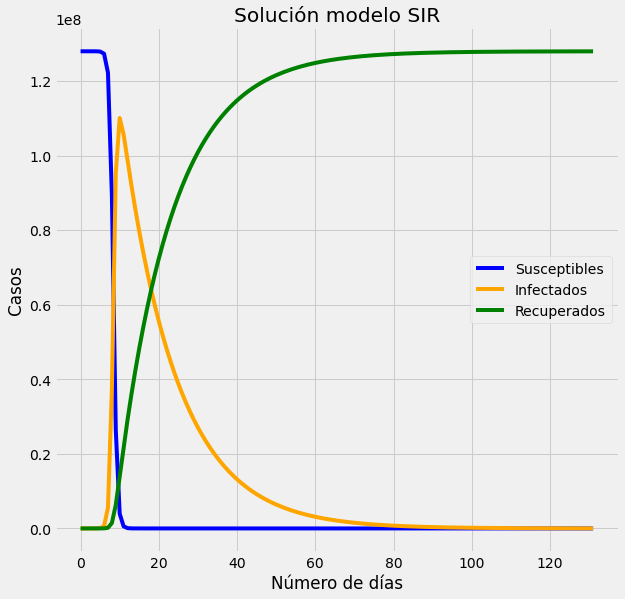

In [0]:
fig, ax = plt.subplots(figsize=(9,9))
ax.set_title('Solución modelo SIR')
ax.plot(S, label ='Susceptibles', color='blue')
ax.plot(I, label='Infectados', color='orange')
ax.plot(R, label='Recuperados', color='green')
ax.set_xlabel('Número de días')
ax.set_ylabel('Casos')

plt.legend()
plt.savefig('SIR')
plt.show()

#Vemos que en efecto, tenemos una solución lógica acorde a nuestro problema planteado.